In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

# df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volc_dec_cat_Ben_Ireland.csv')
print(df)


     width  maxdisp
0     70.0      NaN
1      NaN     19.0
2     50.0      NaN
3     45.0     10.0
4     40.0     45.5
..     ...      ...
288    NaN     12.0
289    NaN     42.0
290    NaN     35.0
291    NaN      8.0
292    NaN      1.5

[293 rows x 2 columns]


In [ ]:

df_mag = df.magnitude/100
df_ax = df.major_axis*1000



# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000
fontsize=12
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR detection limits\nfor {SAT_PROD}',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT detection limits\nfor {SAT_PROD}',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white',label='(Crypto) dome growth') # MSH crypto dome growth
ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
ax.scatter(2000/div,500,s=s,c='black',marker='s',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200) # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='d',zorder=200,label='Plug extrusion') # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='s',zorder=200,label='Caldera floor subsidence') # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='*',zorder=200,label='Dike intrusion') # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='*',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='s',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='*',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='v',zorder=200,label='Flank motion') # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='*',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='Ebmeier et al. (2018)+')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])




## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
rot = 32
ax.text(5,0.00025,f'Phase precision:\n1/{int(1/CYCLE_SLICE)} fringe',zorder=200,fontsize=fontsize)
ax.text(100,0.015,f'SPOT precision:\n1/{int(1/SPOT_LIM)} pixel size',zorder=200,fontsize=fontsize)
ax.text(6500,0.00012,'Swath width\n17500 pixels',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(2,0.001,'Min. footprint:\n10 pixels',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(50,200,'Min. footprint:\n10 adj. windows',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(150,240,'Max. strain for SPOT\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,1.3,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,0.22,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(1200,0.0006,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(10000,0.004,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(5000,110,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(12,0.05,'EQ: Fault rupture',zorder=200,rotation='vertical',fontsize=fontsize)
ax.text(80_000,0.05,'EQ: Far field',zorder=200,rotation='vertical',fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020


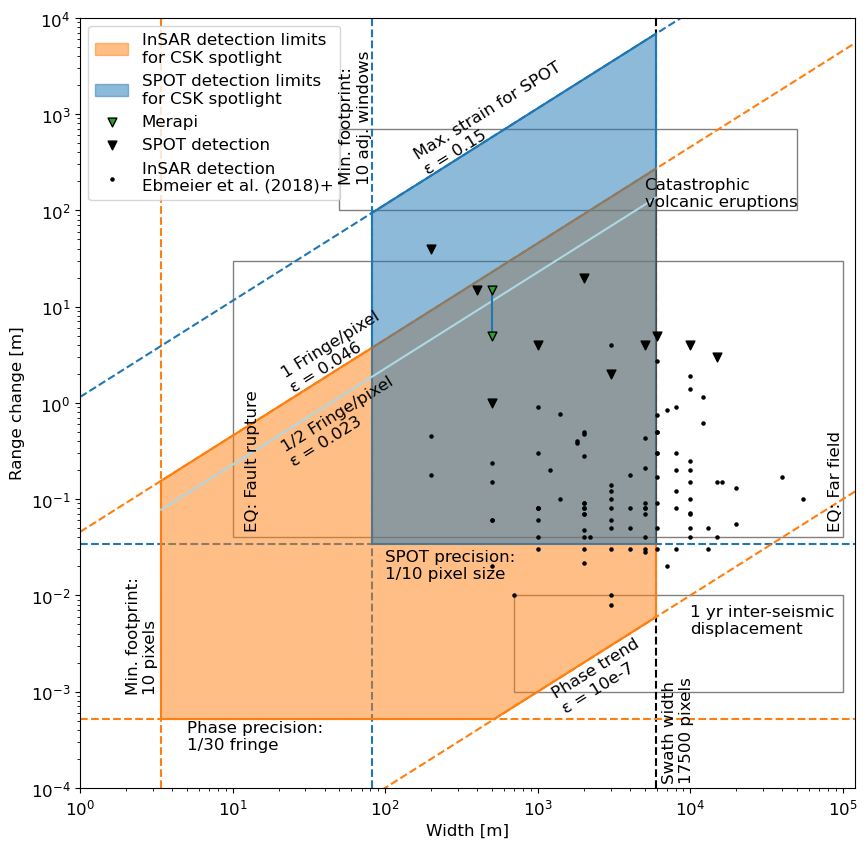

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000
fontsize=12
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR detection limits\nfor {SAT_PROD}',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT detection limits\nfor {SAT_PROD}',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
# ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white',label='(Crypto) dome growth') # MSH crypto dome growth
# ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
# ax.scatter(2000/div,500,s=s,c='black',marker='s',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='v',zorder=200) # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='v',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='v',zorder=200,label='SPOT detection') # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='v',zorder=200) # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='v',zorder=200) # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='v',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='v',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='v',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='v',zorder=200) # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='v',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='InSAR detection\nEbmeier et al. (2018)+')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])




## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
rot = 32
ax.text(5,0.00025,f'Phase precision:\n1/{int(1/CYCLE_SLICE)} fringe',zorder=200,fontsize=fontsize)
ax.text(100,0.015,f'SPOT precision:\n1/{int(1/SPOT_LIM)} pixel size',zorder=200,fontsize=fontsize)
ax.text(6500,0.00012,'Swath width\n17500 pixels',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(2,0.001,'Min. footprint:\n10 pixels',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(50,200,'Min. footprint:\n10 adj. windows',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(150,240,'Max. strain for SPOT\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,1.3,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,0.22,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(1200,0.0006,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

# ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
# ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
# ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

# ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
# ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
# ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
# ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
# ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
# ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
# ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
# ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(10000,0.004,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(5000,110,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(12,0.05,'EQ: Fault rupture',zorder=200,rotation='vertical',fontsize=fontsize)
ax.text(80_000,0.05,'EQ: Far field',zorder=200,rotation='vertical',fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020


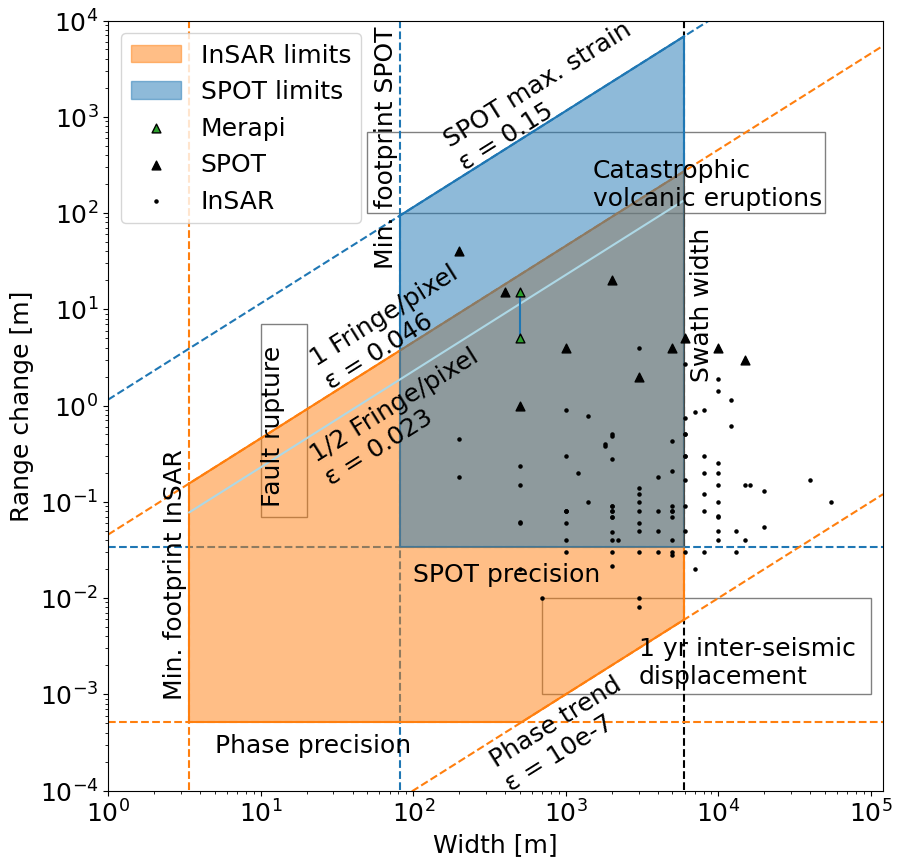

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000
fontsize=18
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR limits',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT limits',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='^',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='^',zorder=200,ec='black') # Merapi 2021
# ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white') # MSH crypto dome growth
# ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
# ax.scatter(2000/div,500,s=s,c='black',marker='^',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200,label='SPOT') # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='^',zorder=200) # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='^',zorder=200) # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='^',zorder=200) # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='^',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='^',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='^',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='^',zorder=200) # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='^',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='InSAR')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])




## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
rot = 32
ax.text(5,0.00025,f'Phase precision',zorder=200,fontsize=fontsize)
ax.text(100,0.015,f'SPOT precision',zorder=200,fontsize=fontsize)
ax.text(6500,2,'Swath width\n',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(2.3,0.001,'Min. footprint InSAR',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(55,30,'Min. footprint SPOT',rotation='vertical',zorder=200,fontsize=fontsize)
ax.text(150,280,'SPOT max. strain\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,1.5,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(20,0.15,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax.text(300,0.0001,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

# ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
# ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
# ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

# ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
# ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
# ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
# ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
# ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
# ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
# ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
# ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(3000,0.0013,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(1500,120,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(10,0.1,'Fault rupture',zorder=200,rotation='vertical',fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020


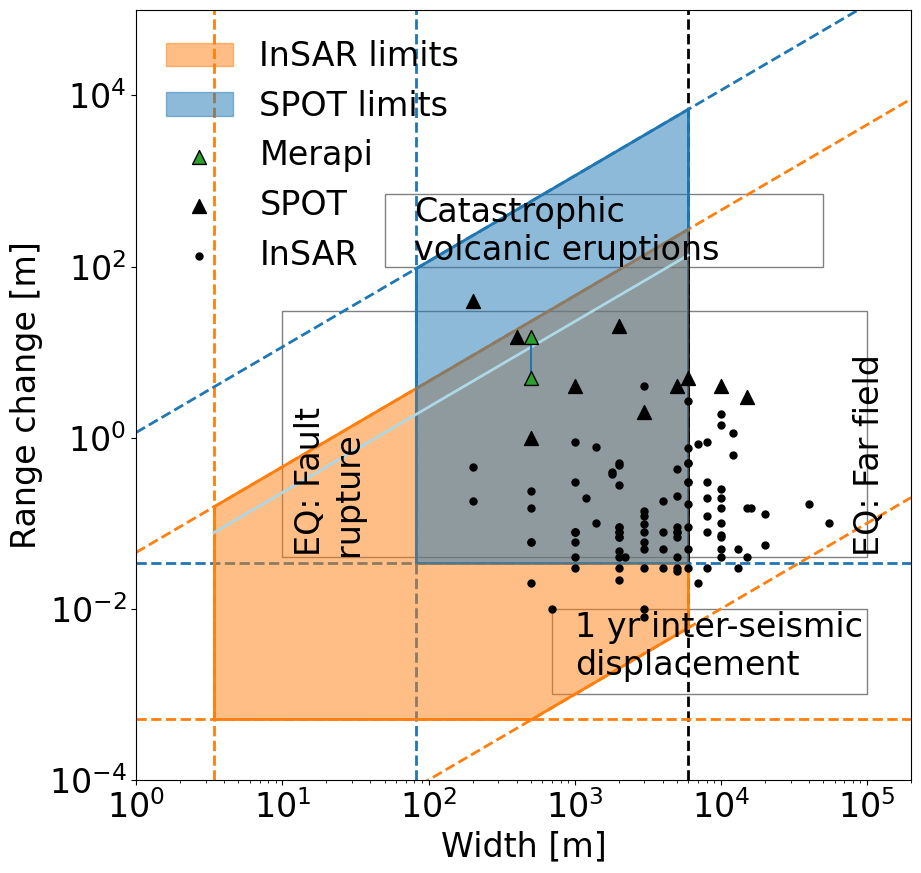

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000

x_min = 1
x_max = 200_000
y_min = 0.0001
y_max = 100_000

lw= 2
fontsize=24
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR limits',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT limits',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--',linewidth=lw) # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,linewidth=lw) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,linewidth=lw) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color,linewidth=lw) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black',linewidth=lw) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linewidth=lw) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linewidth=lw) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 100
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='^',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='^',zorder=200,ec='black') # Merapi 2021
# ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white') # MSH crypto dome growth
# ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
# ax.scatter(2000/div,500,s=s,c='black',marker='^',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200,label='SPOT') # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='^',zorder=200) # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='^',zorder=200) # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='^',zorder=200) # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='^',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='^',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='^',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='^',zorder=200) # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='^',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=s,c='black',marker='.',zorder=200,label='InSAR')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])





## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
# rot = 32
# ax.text(5,0.00025,f'Phase precision',zorder=200,fontsize=fontsize)
# ax.text(100,0.015,f'SPOT precision',zorder=200,fontsize=fontsize)
# ax.text(6500,2,'Swath width\n',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(2.3,0.001,'Min. footprint InSAR',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(55,30,'Min. footprint SPOT',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(150,280,'SPOT max. strain\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(20,1.5,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(20,0.15,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(300,0.0001,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

# ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
# ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
# ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

# ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
# ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
# ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
# ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
# ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
# ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
# ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
# ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(1000,0.0017,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(80,120,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(12,0.05,'EQ: Fault\nrupture',zorder=200,rotation='vertical',fontsize=fontsize)
ax.text(80_000,0.05,'EQ: Far field',zorder=200,rotation='vertical',fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize,frameon=False)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020
# 

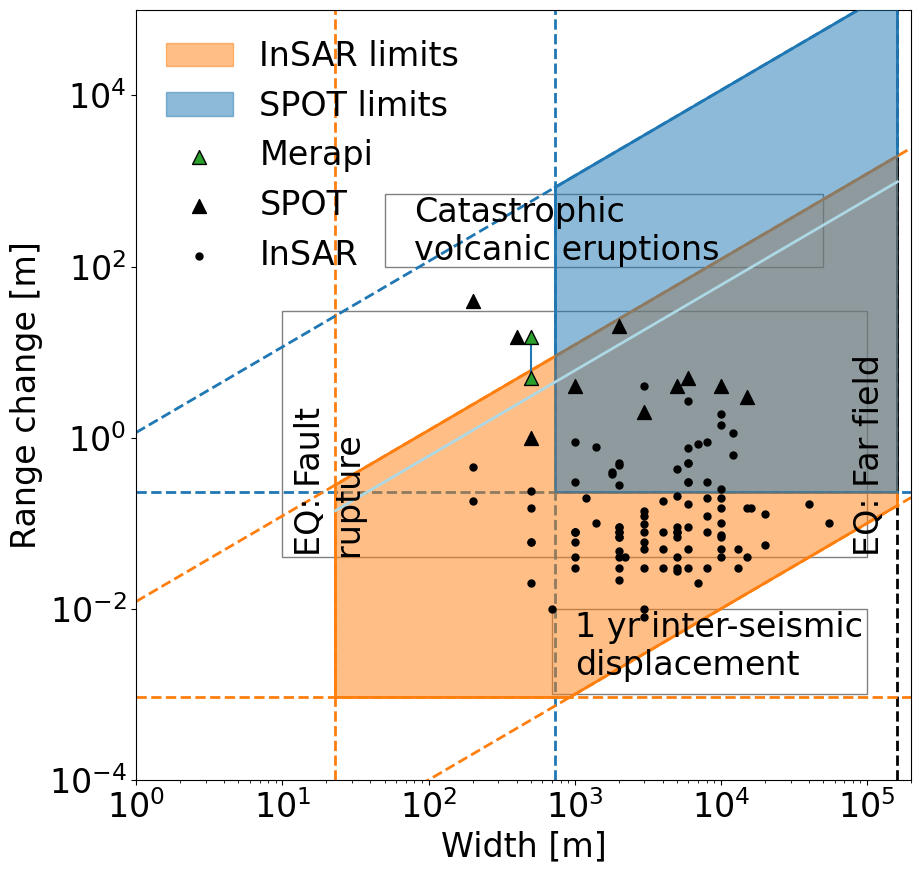

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'Sentinel 1 IW'
WIN_SIZE = 64
RES = 2.3
N_WIN = 10
LAMBDA = 0.056
SPACING = 32
N_PIX = 10
WIDTH = 17478
WIDTH = 70_000
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15



INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000

x_min = 1
x_max = 200_000
y_min = 0.0001
y_max = 100_000

lw= 2
fontsize=24
matplotlib.rcParams.update({'font.size': fontsize})

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR limits',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT limits',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--',linewidth=lw) # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,linewidth=lw) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,linewidth=lw) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color,linewidth=lw) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black',linewidth=lw) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linewidth=lw) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linewidth=lw) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 100
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='^',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='^',zorder=200,ec='black') # Merapi 2021
# ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white') # MSH crypto dome growth
# ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
# ax.scatter(2000/div,500,s=s,c='black',marker='^',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200,label='SPOT') # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='^',zorder=200) # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='^',zorder=200) # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='^',zorder=200) # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='^',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='^',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='^',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='^',zorder=200) # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='^',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=s,c='black',marker='.',zorder=200,label='InSAR')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]',fontsize=fontsize)
ax.set_ylabel('Range change [m]',fontsize=fontsize)

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])





## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
# rot = 32
# ax.text(5,0.00025,f'Phase precision',zorder=200,fontsize=fontsize)
# ax.text(100,0.015,f'SPOT precision',zorder=200,fontsize=fontsize)
# ax.text(6500,2,'Swath width\n',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(2.3,0.001,'Min. footprint InSAR',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(55,30,'Min. footprint SPOT',rotation='vertical',zorder=200,fontsize=fontsize)
# ax.text(150,280,'SPOT max. strain\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(20,1.5,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(20,0.15,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
# ax.text(300,0.0001,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

# ax.text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
# ax.text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
# ax.text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
# ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

# ax.text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
# ax.text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
# ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
# ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
# ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
# ax.text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
# ax.text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
# ax.text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020

ax.text(1000,0.0017,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(80,120,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(12,0.05,'EQ: Fault\nrupture',zorder=200,rotation='vertical',fontsize=fontsize)
ax.text(80_000,0.05,'EQ: Far field',zorder=200,rotation='vertical',fontsize=fontsize)

ax.legend(loc='upper left',fontsize=fontsize,frameon=False)

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020
# 

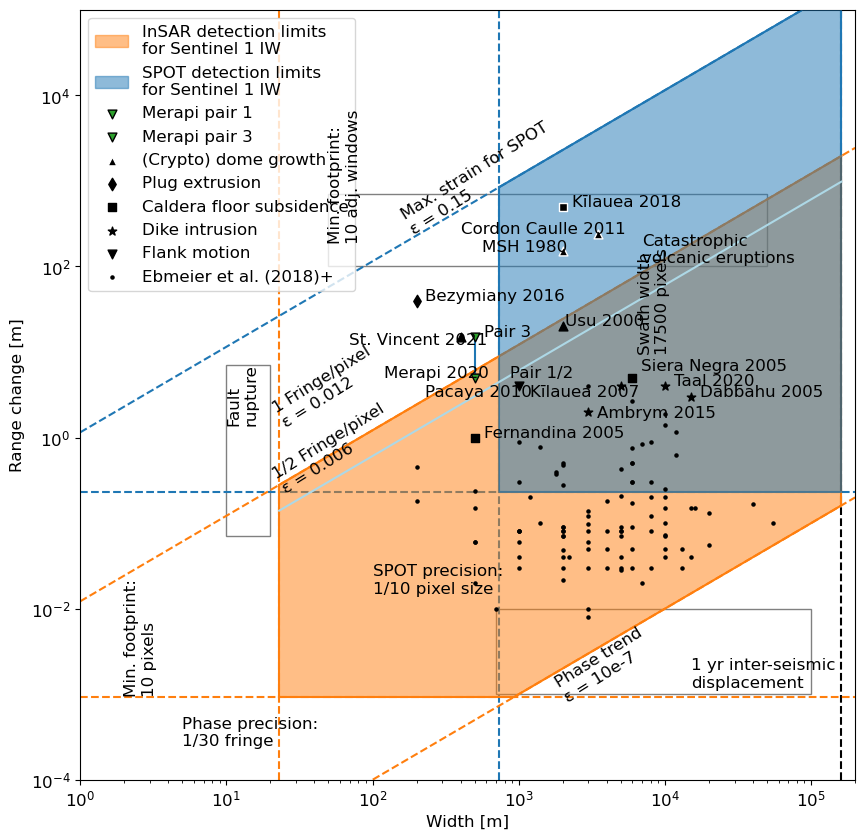

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'Sentinel 1 IW'
WIN_SIZE = 64
RES = 2.3
N_WIN = 10
LAMBDA = 0.056
SPACING = 32
N_PIX = 10
WIDTH = 17478
WIDTH = 70_000
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

x_min = 1
x_max = 200_000
y_min = 0.0001
y_max = 100_000

INSAR_poly = [[N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES],
              [WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES],
              [WIDTH*RES,10e-7*WIDTH*RES],
              [(CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)],
              [N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)]]

SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

polygon_INSAR = Polygon(INSAR_poly, closed=True,color=INSAR_color,alpha=0.5,label=f'InSAR detection limits\nfor {SAT_PROD}',zorder=100)
polygon_SPOT = Polygon(SPOT_poly, closed=True,color=SPOT_color,alpha=0.5,label=f'SPOT detection limits\nfor {SAT_PROD}',zorder=100)



fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.add_patch(polygon_INSAR)
ax.add_patch(polygon_SPOT)

# plot dashed lines
ax.axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax.axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size

ax.axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size

ax.plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude

ax.plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax.plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient

ax.plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax.plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color) # INSAR smallest displacement size
ax.plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color) # SPOT smallest displacement size

ax.plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax.plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size



ax.plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
# ax.axhline([0.01],xmin=x_min,xmax=x_max,c='gray') # INSAR smallest detectable displacement magnitude
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude


ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax.plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient

ax.plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

## add displacement signal patches

# volc_eruptions = mpatches.Polygon([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]],facecolor=None,ec='grey')
# fault_rupture = mpatches.Polygon([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]],facecolor=None,ec='grey')
# interseismic = mpatches.Polygon([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]],facecolor=None,ec='grey')

volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.07],[10,7],[20,7],[20,0.07],[10,0.07]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi pair 1') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi pair 3') # Merapi 2021
ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white',label='(Crypto) dome growth') # MSH crypto dome growth
ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
ax.scatter(2000/div,500,s=s,c='black',marker='s',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200) # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='d',zorder=200,label='Plug extrusion') # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='s',zorder=200,label='Caldera floor subsidence') # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='*',zorder=200,label='Dike intrusion') # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='*',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='s',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='*',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='v',zorder=200,label='Flank motion') # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='*',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='Ebmeier et al. (2018)+')
# ax.scatter(3000,0.01,s=10,c='black',marker='+') # Cerro Prieto subsidence 1 month
# ax.scatter(3000,0.3,s=10,c='black',marker='+') # Cerro Prieto subsidence 3 yr


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Width [m]')
ax.set_ylabel('Range change [m]')

ax.set_ylim([y_min,y_max])
ax.set_xlim([x_min,x_max])




## add text
# ax.text(5,0.00012,'Phase precision:\n1/60 fringe',c=INSAR_color)
# ax.text(240,0.015,'SPOT precision:\n1/10 pixel size',c=SPOT_color)
# ax.text(4500,0.1,'Swath width\n(17500 pixels)',rotation='vertical', c='black')
# ax.text(2.5,10,'Min. footprint:\n10 pixels',rotation='vertical',c=INSAR_color)
# ax.text(59,200,'Min. footprint:\n10 adj. windows',rotation='vertical',c=SPOT_color)
# ax.text(150,90,'max. strain\nɛ = 0.15',rotation=20,c=SPOT_color)
# ax.text(150,3.5,f'max. fringe rate\nɛ = {LAMBDA/(2*RES):0.2f}',rotation=20,c=INSAR_color)
# ax.text(600,0.00030,f'phase trend\nɛ = 10e-7',rotation=20,c=INSAR_color)
rot = 32
ax.text(5,0.00025,f'Phase precision:\n1/{int(1/CYCLE_SLICE)} fringe',zorder=200)
ax.text(100,0.015,f'SPOT precision:\n1/{int(1/SPOT_LIM)} pixel size',zorder=200)
ax.text(6500,10,'Swath width\n17500 pixels',rotation='vertical',zorder=200)
ax.text(2,0.001,'Min. footprint:\n10 pixels',rotation='vertical',zorder=200)
ax.text(50,200,'Min. footprint:\n10 adj. windows',rotation='vertical',zorder=200)
ax.text(150,240,'Max. strain for SPOT\nɛ = 0.15',rotation=rot,zorder=200)
ax.text(20,1.3,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200)
ax.text(20,0.22,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200)
ax.text(1700,0.0008,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200)

delta = 1.15
# ax.text(500/div*delta,5,'1',zorder=200) # merapi 2021
# ax.text(2000/div*delta,150,'2',zorder=200) # MSH 1980 lave dome
# ax.text(3500/div*delta,240,'3',zorder=200) # Cordon caulle
# ax.text(2000/div*delta,500,'4',zorder=200) # Kilauea 2018

# ax.text(400/div*delta,15,'5',zorder=200) # St. Vincent 2021 lave dome
# ax.text(1500/div*delta,20,'6',zorder=200) # Usu 1990 lava dome 
# ax.text(200/div*delta,40,'7',zorder=200) # Bezimiany 2017
# ax.text(6000/div*delta,5,'8',zorder=200) # Siera negra 2005
# ax.text(3000/div*delta,2,'9',zorder=200) # Ambrym
# ax.text(15000/div*delta,3,'10',zorder=200) # Dabbahu dyke intrusion
# ax.text(500/div*delta,1,'11',zorder=200) # Fernandina 2005
# ax.text(3500/div,4,'12',zorder=200) # Kilauea 2007
# ax.text(1000/div*delta,4,'13',zorder=200) # Pacaya 2010
# ax.text(10000/div*delta,4,'14',zorder=200) # Taal 2007

ax.text(105/div*delta,5,'Merapi 2020    Pair 1/2',zorder=200) # merapi 2021
ax.text(500/div*delta,15,'Pair 3',zorder=200) # merapi 2021
ax.text(490/div*delta,150,'MSH 1980',zorder=200) # MSH 1980 lave dome
ax.text(350/div*delta,240,'Cordon Caulle 2011',zorder=200) # Cordon caulle
ax.text(2000/div*delta,500,'Kīlauea 2018',zorder=200) # Kilauea 2018

ax.text(60/div*delta,12,'St. Vincent 2021',zorder=200) # St. Vincent 2021 lave dome
ax.text(1800/div*delta,20,'Usu 2000',zorder=200) # Usu 1990 lava dome 
ax.text(200/div*delta,40,'Bezymiany 2016',zorder=200) # Bezimiany 2017
ax.text(6000/div*delta,6,'Siera Negra 2005',zorder=200) # Siera negra 2005
ax.text(3000/div*delta,1.7,'Ambrym 2015',zorder=200) # Ambrym
ax.text(15000/div*delta,3,'Dabbahu 2005',zorder=200) # Dabbahu dyke intrusion
ax.text(500/div*delta,1,'Fernandina 2005',zorder=200) # Fernandina 2005
ax.text(1200/div,3,'Kīlauea 2007',zorder=200) # Kilauea 2007
ax.text(200/div*delta,3,'Pacaya 2010',zorder=200) # Pacaya 2010
ax.text(10000/div*delta,4,'Taal 2020',zorder=200) # Taal 2020

ax.text(15000,0.0012,'1 yr inter-seismic\ndisplacement',zorder=200)
ax.text(7000,110,'Catastrophic\nvolcanic eruptions',zorder=200)
ax.text(10,1.5,'Fault\nrupture',zorder=200,rotation='vertical')

ax.legend(loc='upper left')

# ax.grid(zorder=-1)

# ax.scatter(500,10,s=10,c='green',marker='+') # Merapi 2021
# ax.scatter(1000,150,s=10,c='black',marker='+') # MSH crypto dome growth
# ax.scatter(400,15,s=10,c='black',marker='+') # St. Vincent lava dome growth
# ax.scatter(1500,20,s=10,c='black',marker='+') # Usu volcano crypto dome growth
# ax.scatter(200,40,s=10,c='black',marker='+') # Bezymianny crater floor uplift
# ax.scatter(6000,5,s=10,c='black',marker='+') # Siera Nerga co-eruptive subsidence 
# ax.scatter(3000,2,s=10,c='black',marker='+') # Ambrym
# ax.scatter(15000,3,s=10,c='black',marker='+') # Dabbahu dyke intrusion
# ax.scatter(500,1,s=10,c='black',marker='+') # Fernandina 2005
# ax.scatter(5000,4,s=10,c='black',marker='+') # Kilauea 2007
# ax.scatter(1000,4,s=10,c='black',marker='+') # Pacaya 2010
# ax.scatter(10000,4,s=10,c='black',marker='+') # Taal 2020


## 4 panel figure showing limits



In [1]:
%matplotlib osx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from shapely.geometry import Polygon, Point, LineString

import adjustText

# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib

# from matplotlib.patches import Polygon as mpl.
# import matplotlib.patches as mpatches
import pandas as pd

# df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volc_dec_cat_Ben_Ireland.csv')
print(df)
df_mag = df.maxdisp/100
df_ax = df.width*1000


# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

InSAR_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",[(1,1,1,0),(np.append(np.array((matplotlib.colors.to_rgb('tab:orange'))),[0.6]))])
SPOT_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",[(1,1,1,0),(np.append(np.array((matplotlib.colors.to_rgb('tab:blue'))),[0.6]))])
# np.append(np.array((matplotlib.colors.to_rgb('tab:orange'))),[0.6])

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000

lw= 2
fontsize=12
matplotlib.rcParams.update({'font.size': fontsize})
delta = 1.15
rot=28


# Create a figure and axis
fig, ax = plt.subplots(2,2)

for a in ax.ravel():
    a.set_xlim((x_min,x_max))
    a.set_ylim((y_min,y_max))
    a.set_xscale('log')
    a.set_yscale('log')
    a.set_xlabel('Width [m]')
    a.set_ylabel('Range change [m]')
# ax 0,0 datapoints and boxes


volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax[0,0].fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax[0,0].fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax[0,0].fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax[0,0].plot([500/div,500/div],[5,15],zorder=200)
ax[0,0].scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax[0,0].scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax[0,0].scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white',label='(Crypto) dome growth') # MSH crypto dome growth
ax[0,0].scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
ax[0,0].scatter(2000/div,500,s=s,c='black',marker='s',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax[0,0].scatter(400/div,15,s=s,c='black',marker='^',zorder=200) # St. Vincent lava dome growth
ax[0,0].scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax[0,0].scatter(200/div,40,s=s,c='black',marker='d',zorder=200,label='Plug extrusion') # Bezymianny crater floor uplift
ax[0,0].scatter(6000/div,5,s=s,c='black',marker='s',zorder=200,label='Caldera floor subsidence') # Siera Nerga co-eruptive subsidence 
ax[0,0].scatter(3000/div,2,s=s,c='black',marker='*',zorder=200,label='Dike intrusion') # Ambrym
ax[0,0].scatter(15000/div,3,s=s,c='black',marker='*',zorder=200) # Dabbahu dyke intrusion
ax[0,0].scatter(500/div,1,s=s,c='black',marker='s',zorder=200) # Fernandina 2005
ax[0,0].scatter(5000/div,4,s=s,c='black',marker='*',zorder=200) # Kilauea 2007
ax[0,0].scatter(1000/div,4,s=s,c='black',marker='v',zorder=200,label='Flank motion') # Pacaya 2010
ax[0,0].scatter(10000/div,4,s=s,c='black',marker='*',zorder=200) # Taal 2020

ax[0,0].scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='Ebmeier et al. (2018)+')


labels = ['Merapi 2020  Pair 1/2',
          'Pair 3',
          'MSH 1980',
          'Cordon Caulle 2011',
          'Kīlauea 2018',
          'St. Vincent 2021',
          'Usu 2000',
          'Bezymiany 2016',
          'Siera Negra 2005',
          'Ambrym 2015',
          'Dabbahu 2005',
          'Fernandina 2005',
          'Kīlauea 2007',
          'Pacaya 2010',
          'Taal 2020']
labelsx = [500/div,
           500/div,
           2000/div,
           3500/div,
           2000/div,
           400/div,
           2000/div,
           200/div,
           6000/div,
           3000/div,
           15000/div,
           500/div,
           5000/div,
           1000/div,
           10000/div]
labelsy = [5,
           15,
           150,
           240,
           500,
           15,
           20,
           40,
           5,
           2,
           3,
           1,
           4,
           4,
           4]


texts = [ax[0,0].text(labelx,labely,lab,ha='center', va='center') for (labelx,labely,lab) in zip(labelsx,labelsy,labels)]
adjustText.adjust_text(texts,arrowprops=dict(arrowstyle='->', color='red'))
ax[0,0].text(10000,0.004,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax[0,0].text(5000,110,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax[0,0].text(12,0.05,'EQ: Fault rupture',zorder=200,rotation='vertical',fontsize=fontsize)
ax[0,0].text(80_000,0.05,'EQ: Far field',zorder=200,rotation='vertical',fontsize=fontsize)


## ax(0,1) limits of CSK spotlight


# plot dashed lines
ax[0,1].axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax[0,1].axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size
ax[0,1].axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size
ax[0,1].plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
ax[0,1].plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude
ax[0,1].plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax[0,1].plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient
ax[0,1].plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax[0,1].plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color) # INSAR smallest displacement size
ax[0,1].plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color) # SPOT smallest displacement size
ax[0,1].plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax[0,1].plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax[0,1].plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size
ax[0,1].plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
ax[0,1].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude
ax[0,1].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax[0,1].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax[0,1].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient
ax[0,1].plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

# text
ax[0,1].text(5,0.00025,f'Phase precision',zorder=200,fontsize=fontsize)
ax[0,1].text(100,0.015,f'SPOT precision',zorder=200,fontsize=fontsize)
ax[0,1].text(6500,2,'Swath width\n',rotation='vertical',zorder=200,fontsize=fontsize)
ax[0,1].text(2.3,0.001,'Min. footprint InSAR',rotation='vertical',zorder=200,fontsize=fontsize)
ax[0,1].text(55,30,'Min. footprint SPOT',rotation='vertical',zorder=200,fontsize=fontsize)
ax[0,1].text(150,280,'SPOT max. strain\nɛ = 0.15',rotation=rot,zorder=200,fontsize=fontsize)
ax[0,1].text(20,1.5,f'1 Fringe/pixel\nɛ = {LAMBDA/(2*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax[0,1].text(20,0.15,f'1/2 Fringe/pixel\nɛ = {LAMBDA/(4*RES):0.3f}',rotation=rot,zorder=200,fontsize=fontsize)
ax[0,1].text(300,0.0001,f'Phase trend\nɛ = 10e-7',rotation=rot,zorder=200,fontsize=fontsize)


## INSAR and SPOT regions

INSAR_poly = [(N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)),
              (N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES),
              (WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES),
              (WIDTH*RES,10e-7*WIDTH*RES),
              ((CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)),
              (N_PIX*RES,CYCLE_SLICE*(LAMBDA/2))]

INSAR_poly_log1 = np.log10(INSAR_poly)
INSAR_poly_log2 = np.row_stack((INSAR_poly_log1[1:],INSAR_poly_log1[0]))

# Create a Shapely Polygon object
polygon = Polygon(INSAR_poly)

# Define the range of x and y values
x_range = np.logspace(np.log10(x_min), np.log10(x_max), 300)
y_range = np.logspace(np.log10(y_min), np.log10(y_max), 300)
# Create a meshgrid
xx, yy = np.meshgrid(x_range, y_range)

# Flatten the meshgrid for easier calculations
points = np.c_[np.log10(xx).ravel(), np.log10(yy).ravel()]

# Initialize an array to store the transparency values
transparency = np.full((len(points),1),np.nan)
# alpha = np.zeros(len(points))
# Calculate the transparency values for points inside the polygon
for i, point in enumerate(points):
    lin_point = [10**point[0],10**point[1]]

    if polygon.contains(Point(lin_point)):
        # alpha[i]=0.4
        distances = [LineString([p1, p2]).distance(Point(point)) for p1, p2 in zip(INSAR_poly_log1, INSAR_poly_log2)]
        min_distance = min(distances)
        transparency[i] = min_distance

# Normalize the transparency values between 0 and 1
transparency = transparency / np.nanmax(transparency)

# Reshape the transparency array to match the meshgrid shape
transparency = transparency.reshape(xx.shape)
# alpha = alpha.reshape(xx.shape)


# Create a scatter plot with varying transparency
scatter = ax[1,0].hexbin(xx.flatten(), 
                    yy.flatten(), 
                    C=transparency.flatten(), 
                    gridsize=100,
                    cmap=InSAR_cmap,
                    vmin=0,
                    vmax=0.2,
                    edgecolors='none',
                    xscale='log',
                    yscale='log',
                    zorder=-100)

# Add the polygon edges
polygon = patches.Polygon(INSAR_poly, closed=True, edgecolor=INSAR_color, facecolor='none')
ax[1,0].add_patch(polygon)



SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

SPOT_poly_log1 = np.log10(SPOT_poly)
SPOT_poly_log2 = np.row_stack((SPOT_poly_log1[1:],SPOT_poly_log1[0]))

# Create a Shapely Polygon object
polygon = Polygon(SPOT_poly)

transparency = np.full((len(points),1),np.nan)
# alpha = np.zeros(len(points))
# Calculate the transparency values for points inside the polygon
for i, point in enumerate(points):
    lin_point = [10**point[0],10**point[1]]
    if polygon.contains(Point(lin_point)):
        # alpha[i]=0.4
        distances = [LineString([p1, p2]).distance(Point(point)) for p1, p2 in zip(SPOT_poly_log1, SPOT_poly_log2)]
        min_distance = min(distances)
        transparency[i] = min_distance

# Normalize the transparency values between 0 and 1
transparency = transparency / np.nanmax(transparency)

# Reshape the transparency array to match the meshgrid shape
transparency = transparency.reshape(xx.shape)
# alpha = alpha.reshape(xx.shape)


# Create a scatter plot with varying transparency
scatter = ax[1,0].hexbin(xx.flatten(), 
                    yy.flatten(), 
                    C=transparency.flatten(), 
                    gridsize=100,
                    cmap=SPOT_cmap,
                    vmin=0,
                    vmax=0.4,
                    edgecolors='none',
                    xscale='log',
                    yscale='log',
                    zorder=-100)

# Add the polygon edges
polygon = patches.Polygon(SPOT_poly, closed=True, edgecolor=SPOT_color, facecolor='none')
ax[1,0].add_patch(polygon)



# plot dashed lines
ax[1,0].axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest displacement size
ax[1,0].axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest displacement size
ax[1,0].axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--',linewidth=lw) # largest displacement size
ax[1,0].plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest detectable displacement magnitude
ax[1,0].plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest detectable displacement magnitude
ax[1,0].plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,0].plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT max detectable lateral displacement gradient
ax[1,0].plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR min detectable lateral displacement gradient

# plot solid lines
ax[1,0].plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,linewidth=lw) # INSAR smallest displacement size
ax[1,0].plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,linewidth=lw) # SPOT smallest displacement size
ax[1,0].plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color,linewidth=lw) # largest displacement size
ax[1,0].plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black',linewidth=lw) # largest displacement size
ax[1,0].plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # largest displacement size
ax[1,0].plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linewidth=lw) # INSAR smallest detectable displacement magnitude
ax[1,0].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linewidth=lw) # SPOT smallest detectable displacement magnitude
ax[1,0].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,0].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,0].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # SPOT max detectable lateral displacement gradient
ax[1,0].plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR min detectable lateral displacement gradient


## ax 1,1 limits for Sentinel-1

# define constants
SAT_PROD = 'Sentinel 1 IW'
WIN_SIZE = 64
RES = 2.3
N_WIN = 10
LAMBDA = 0.056
SPACING = 32
N_PIX = 10
WIDTH = 17478
WIDTH = 70_000
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


## INSAR and SPOT regions

INSAR_poly = [(N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)),
              (N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES),
              (WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES),
              (WIDTH*RES,10e-7*WIDTH*RES),
              ((CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)),
              (N_PIX*RES,CYCLE_SLICE*(LAMBDA/2))]

INSAR_poly_log1 = np.log10(INSAR_poly)
INSAR_poly_log2 = np.row_stack((INSAR_poly_log1[1:],INSAR_poly_log1[0]))

# Create a Shapely Polygon object
polygon = Polygon(INSAR_poly)

# Define the range of x and y values
x_range = np.logspace(np.log10(x_min), np.log10(x_max), 300)
y_range = np.logspace(np.log10(y_min), np.log10(y_max), 300)
# Create a meshgrid
xx, yy = np.meshgrid(x_range, y_range)

# Flatten the meshgrid for easier calculations
points = np.c_[np.log10(xx).ravel(), np.log10(yy).ravel()]

# Initialize an array to store the transparency values
transparency = np.full((len(points),1),np.nan)
# alpha = np.zeros(len(points))
# Calculate the transparency values for points inside the polygon
for i, point in enumerate(points):
    lin_point = [10**point[0],10**point[1]]

    if polygon.contains(Point(lin_point)):
        # alpha[i]=0.4
        distances = [LineString([p1, p2]).distance(Point(point)) for p1, p2 in zip(INSAR_poly_log1, INSAR_poly_log2)]
        min_distance = min(distances)
        transparency[i] = min_distance

# Normalize the transparency values between 0 and 1
transparency = transparency / np.nanmax(transparency)

# Reshape the transparency array to match the meshgrid shape
transparency = transparency.reshape(xx.shape)
# alpha = alpha.reshape(xx.shape)


# Create a scatter plot with varying transparency
scatter = ax[1,1].hexbin(xx.flatten(), 
                    yy.flatten(), 
                    C=transparency.flatten(), 
                    gridsize=100,
                    cmap=InSAR_cmap,
                    vmin=0,
                    vmax=0.2,
                    edgecolors='none',
                    xscale='log',
                    yscale='log',
                    zorder=-100)

# Add the polygon edges
polygon = patches.Polygon(INSAR_poly, closed=True, edgecolor=INSAR_color, facecolor='none')
ax[1,1].add_patch(polygon)



SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

SPOT_poly_log1 = np.log10(SPOT_poly)
SPOT_poly_log2 = np.row_stack((SPOT_poly_log1[1:],SPOT_poly_log1[0]))

# Create a Shapely Polygon object
polygon = Polygon(SPOT_poly)

transparency = np.full((len(points),1),np.nan)
# alpha = np.zeros(len(points))
# Calculate the transparency values for points inside the polygon
for i, point in enumerate(points):
    lin_point = [10**point[0],10**point[1]]
    if polygon.contains(Point(lin_point)):
        # alpha[i]=0.4
        distances = [LineString([p1, p2]).distance(Point(point)) for p1, p2 in zip(SPOT_poly_log1, SPOT_poly_log2)]
        min_distance = min(distances)
        transparency[i] = min_distance

# Normalize the transparency values between 0 and 1
transparency = transparency / np.nanmax(transparency)

# Reshape the transparency array to match the meshgrid shape
transparency = transparency.reshape(xx.shape)
# alpha = alpha.reshape(xx.shape)


# Create a scatter plot with varying transparency
scatter = ax[1,1].hexbin(xx.flatten(), 
                    yy.flatten(), 
                    C=transparency.flatten(), 
                    gridsize=100,
                    cmap=SPOT_cmap,
                    vmin=0,
                    vmax=0.4,
                    edgecolors='none',
                    xscale='log',
                    yscale='log',
                    zorder=-100)

# Add the polygon edges
polygon = patches.Polygon(SPOT_poly, closed=True, edgecolor=SPOT_color, facecolor='none')
ax[1,1].add_patch(polygon)



# plot dashed lines
ax[1,1].axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest displacement size
ax[1,1].axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest displacement size
ax[1,1].axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--',linewidth=lw) # largest displacement size
ax[1,1].plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest detectable displacement magnitude
ax[1,1].plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest detectable displacement magnitude
ax[1,1].plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,1].plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT max detectable lateral displacement gradient
ax[1,1].plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR min detectable lateral displacement gradient

# plot solid lines
ax[1,1].plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,linewidth=lw) # INSAR smallest displacement size
ax[1,1].plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,linewidth=lw) # SPOT smallest displacement size
ax[1,1].plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color,linewidth=lw) # largest displacement size
ax[1,1].plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black',linewidth=lw) # largest displacement size
ax[1,1].plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # largest displacement size
ax[1,1].plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linewidth=lw) # INSAR smallest detectable displacement magnitude
ax[1,1].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linewidth=lw) # SPOT smallest detectable displacement magnitude
ax[1,1].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,1].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,1].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # SPOT max detectable lateral displacement gradient
ax[1,1].plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR min detectable lateral displacement gradient




     width  maxdisp
0     70.0      NaN
1      NaN     19.0
2     50.0      NaN
3     45.0     10.0
4     40.0     45.5
..     ...      ...
288    NaN     12.0
289    NaN     42.0
290    NaN     35.0
291    NaN      8.0
292    NaN      1.5

[293 rows x 2 columns]


/Users/markbemelmans/opt/anaconda3/envs/limitS_of_sar/lib/python3.11/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)
/Users/markbemelmans/opt/anaconda3/envs/limitS_of_sar/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


In [2]:
%matplotlib osx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from shapely.geometry import Polygon, Point, LineString

import adjustText

# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib

# from matplotlib.patches import Polygon as mpl.
# import matplotlib.patches as mpatches
import pandas as pd

# df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volc_dec_cat_Ben_Ireland.csv')
print(df)
df_mag = df.maxdisp/100
df_ax = df.width*1000



# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

InSAR_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",[(1,1,1,0),(np.append(np.array((matplotlib.colors.to_rgb('tab:orange'))),[0.6]))])
SPOT_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",[(1,1,1,0),(np.append(np.array((matplotlib.colors.to_rgb('tab:blue'))),[0.6]))])
# np.append(np.array((matplotlib.colors.to_rgb('tab:orange'))),[0.6])

x_min = 1
x_max = 200_000
y_min = 0.0001
y_max = 10_000

lw= 2
fontsize=12
matplotlib.rcParams.update({'font.size': fontsize})
delta = 1.15
rot=45


# Create a figure and axis
fig, axes = plt.subplots(1,4)

ax = np.reshape(axes,(2,2))


ax[0,0].set_xlim((x_min,x_max))
ax[0,0].set_ylim((y_min,y_max))
ax[0,0].set_xlabel('Width [m]')
ax[0,0].set_ylabel('Range change [m]')
# ax 0,0 datapoints and boxes


volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
slow_landslides = np.array([[10,0.001],[10,100],[3_000,100],[3_000,0.001],[10,0.001]])
ax[0,0].fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax[0,0].fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='blue')
ax[0,0].fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='lightblue')
ax[0,0].fill(slow_landslides[:,0],slow_landslides[:,1],facecolor=[0,0,0,0], ec='lightgreen')

# ## plot ellipses for areas
# volc_eruption_mid = [((np.log10(50)+np.log10(50_000))/2),((np.log10(100)+np.log10(700))/2)]
# volc_width = 3
# volc_height = np.log10(700)-np.log10(100)
# earthquake_mid = [((np.log10(10)+np.log10(100_000))/2),((np.log10(0.04)+np.log10(30))/2)]
# eq_width = 4
# eq_height = np.log10(30)-np.log10(0.04)
# interseismic_mid = [((np.log10(700)+np.log10(100_000))/2),((np.log10(0.001)+np.log10(0.01))/2)]
# inter_width = np.log10(100_000)-np.log10(700)
# inter_height = np.log10(0.01)-np.log10(0.001)
# landslide_mid = [((np.log10(10)+np.log10(3_000))/2),((np.log10(0.001)+np.log10(100))/2)]
# land_width = np.log10(3_000)-np.log10(10)
# land_height = np.log10(100)-np.log10(0.001)

# def ellipse_coords(mid,width,height):
#     x = np.linspace(-width/2,width/2,100)
#     y = (height/width)*np.sqrt((width/2)**2 - x**2)
#     coords1 = np.column_stack((x,y))
#     coords2 = np.column_stack((x,-y))
#     coords = np.row_stack((coords1,coords2))+mid
#     return coords


# ax[0,0].plot(10**ellipse_coords(volc_eruption_mid,volc_width,volc_height))
# ax[0,0].plot(10**ellipse_coords(earthquake_mid,eq_width,eq_height))
# ax[0,0].plot(10**ellipse_coords(interseismic_mid,inter_width,inter_height))
# ax[0,0].plot(10**ellipse_coords(landslide_mid,land_width,land_height))
# volc_eruptions_ellipse = patches.Ellipse(np.log10(volc_eruption_mid),width=3,height=(np.log10(700)-np.log10(100)),facecolor=None,edgecolor='grey')
# earthquake_ellipse = patches.Ellipse(np.log10(earthquake_mid),width=4,height=(np.log10(30)-np.log10(0.04)),facecolor=None,edgecolor='blue')
# interseismic_ellipse = patches.Ellipse(np.log10(interseismic_mid),width=(np.log10(100_000)-np.log10(700)),height=(np.log10(0.01)-np.log10(0.001)),facecolor=None,edgecolor='lightblue')
# landslide_ellipse = patches.Ellipse(np.log10(landslide_mid),width=(np.log10(3_000)-np.log10(10)),height=(np.log10(100)-np.log10(0.001)),facecolor=None,edgecolor='lightgreen')

# volc_eruptions_poly = patches.Polygon(10**volc_eruptions_ellipse.get_patch_transform().transform(volc_eruptions_ellipse.get_path().vertices),closed=True,facecolor='none',edgecolor='grey')
# earthquake_poly = patches.Polygon(10**earthquake_ellipse.get_patch_transform().transform(earthquake_ellipse.get_path().vertices),closed=True,facecolor='none',edgecolor='grey')
# interseismic_poly = patches.Polygon(10**interseismic_ellipse.get_patch_transform().transform(interseismic_ellipse.get_path().vertices),closed=True,facecolor='none',edgecolor='grey')
# landslide_poly = patches.Polygon(10**landslide_ellipse.get_patch_transform().transform(landslide_ellipse.get_path().vertices),closed=True,facecolor='none',edgecolor='grey')
# ax[0,0].add_patch(volc_eruptions_poly)
# ax[0,0].add_patch(earthquake_poly)
# ax[0,0].add_patch(interseismic_poly)
# ax[0,0].add_patch(landslide_poly)

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax[0,0].plot([500/div,500/div],[5,15],zorder=200)
ax[0,0].scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax[0,0].scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax[0,0].scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,lw=2,ec='grey') # MSH crypto dome growth
ax[0,0].scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,lw=2,ec='grey') # Cordon Caulle laccolith growth
ax[0,0].scatter(2000/div,500,s=s,c='black',marker='s',zorder=200,lw=2,ec='grey') # Kilaula 2018 caldera floor subsidence

ax[0,0].scatter(400/div,15,s=s,c='black',marker='^',zorder=200,label='(Crypto) dome growth') # St. Vincent lava dome growth
ax[0,0].scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax[0,0].scatter(200/div,40,s=s,c='black',marker='d',zorder=200,label='Plug extrusion') # Bezymianny crater floor uplift
ax[0,0].scatter(6000/div,5,s=s,c='black',marker='s',zorder=200,label='Caldera floor subsidence') # Siera Nerga co-eruptive subsidence 
ax[0,0].scatter(3000/div,2,s=s,c='black',marker='*',zorder=200,label='Dike intrusion') # Ambrym
ax[0,0].scatter(15000/div,3,s=s,c='black',marker='*',zorder=200) # Dabbahu dyke intrusion
ax[0,0].scatter(500/div,1,s=s,c='black',marker='s',zorder=200) # Fernandina 2005
ax[0,0].scatter(5000/div,4,s=s,c='black',marker='*',zorder=200) # Kilauea 2007
ax[0,0].scatter(1000/div,4,s=s,c='black',marker='v',zorder=200,label='Flank motion') # Pacaya 2010
ax[0,0].scatter(10000/div,4,s=s,c='black',marker='*',zorder=200) # Taal 2020

ax[0,0].scatter(df_ax,df_mag,s=20,c='grey',marker='.',zorder=-100,label='Ebmeier et al. (2018)+')


labels = ['Merapi Pair 1/2',
          'Merapi Pair 3',
          'MSH',
          'CC',
          'Kīl 2018',
          'StVin',
          'Usu',
          'Bez',
          'SrNg',
          'Amb',
          'Dab',
          'Fer',
          'Kīl 2007',
          'Pac',
          'Taal']
labelsx = [500/div,
           500/div,
           2000/div,
           3500/div,
           2000/div,
           400/div,
           2000/div,
           200/div,
           6000/div,
           3000/div,
           15000/div,
           500/div,
           5000/div,
           1000/div,
           10000/div]
labelsy = [5,
           15,
           150,
           240,
           500,
           15,
           20,
           40,
           5,
           2,
           3,
           1,
           4,
           4,
           4]


import networkx as nx
def repel_labels(ax, x_in, y_in, labels, k=0.01, logscale=0, center_in=None):
    G = nx.DiGraph()
    data_nodes = []
    init_pos = {}

    if logscale:
        x = np.log10(x_in)
        y = np.log10(y_in)
        if center_in is not None:
            center = np.log10(center_in)
        else:
            center=center_in
    else:
        x = x_in
        y = y_in
        center =center_in

    for xi, yi, label in zip(x, y, labels):
        data_str = 'data_{0}'.format(label)
        G.add_node(data_str)
        G.add_node(label)
        G.add_edge(label, data_str)
        data_nodes.append(data_str)
        init_pos[data_str] = (xi, yi)
        init_pos[label] = (xi, yi)

    pos = nx.spring_layout(G, pos=init_pos, fixed=data_nodes, k=k,center=center)

    # undo spring_layout's rescaling
    pos_after = np.vstack([pos[d] for d in data_nodes])
    pos_before = np.vstack([init_pos[d] for d in data_nodes])
    scale, shift_x = np.polyfit(pos_after[:,0], pos_before[:,0], 1)
    scale, shift_y = np.polyfit(pos_after[:,1], pos_before[:,1], 1)
    shift = np.array([shift_x, shift_y])
    for (key, val) in zip(pos.keys(),pos.values()):
        pos[key] = (val*scale) + shift
        if logscale:
            pos[key] = 10**pos[key]

    for label, data_str in G.edges():
        ax.annotate(label,
                    xy=pos[data_str], xycoords='data',
                    xytext=pos[label], textcoords='data',
                    arrowprops=dict(arrowstyle="->",
                                    shrinkA=0, shrinkB=0,
                                    connectionstyle="arc3", 
                                    color='red'),
                                     horizontalalignment='right',)
    # expand limits
    all_pos = np.vstack([val for val in pos.values()])
    x_span, y_span = np.ptp(all_pos, axis=0)



repel_labels(ax[0,0], labelsx, labelsy, labels, k=0.3,logscale=1,center_in=(1500,12))


# ax[0,0].text(900,0.0003,'inter-seismic\ndisplacement (1 yr)',zorder=200,fontsize=fontsize,color='lightblue')


ax[0,0].annotate('Catastrophic\nvolcanic eruptions',
            xy=[50,700], xycoords='data',
            xytext=[1,1100], textcoords='data',
            color='grey',
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="arc3", 
                            color='grey'),
                            horizontalalignment='left',)
ax[0,0].annotate('Earthquake:\nFault rupture',
            xy=[10,0.04], xycoords='data',
            xytext=[1,0.006], textcoords='data',
            color='blue',
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="arc3", 
                            color='blue'),
                            horizontalalignment='left',)
ax[0,0].annotate('Earthquake:\nFar field',
            xy=[100_000,0.04], xycoords='data',
            xytext=[80_000,0.006], textcoords='data',
            color='blue',
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="arc3", 
                            color='blue'),
                            horizontalalignment='right',)


ax[0,0].annotate('Slow moving\nlandslides (1 yr)',
            xy=[10,0.001], xycoords='data',
            xytext=[1.3,0.0002], textcoords='data',
            color='lightgreen',
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="arc3", 
                            color='lightgreen'),
                            horizontalalignment='left',)
ax[0,0].annotate('Interseismic\ndisplacement (1 yr)',
            xy=[900,0.001], xycoords='data',
            xytext=[400,0.0002], textcoords='data',
            color='lightblue',
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="arc3", 
                            color='lightblue'),
                            horizontalalignment='left',)

ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')

ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12))



## ax(0,1) limits of CSK spotlight


# plot dashed lines
ax[0,1].axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--') # INSAR smallest displacement size
ax[0,1].axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--') # SPOT smallest displacement size
ax[0,1].axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--') # largest displacement size
ax[0,1].plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--') # INSAR smallest detectable displacement magnitude
ax[0,1].plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--') # SPOT smallest detectable displacement magnitude
ax[0,1].plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--') # INSAR max detectable lateral displacement gradient
ax[0,1].plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--') # SPOT max detectable lateral displacement gradient
ax[0,1].plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--') # INSAR min detectable lateral displacement gradient

# plot solid lines
ax[0,1].plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,label='InSAR limit') # INSAR smallest displacement size
ax[0,1].plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,label='SPOT limits') # SPOT smallest displacement size
ax[0,1].plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color) # largest displacement size
ax[0,1].plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black') # largest displacement size
ax[0,1].plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # largest displacement size
ax[0,1].plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color) # INSAR smallest detectable displacement magnitude
ax[0,1].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color) # SPOT smallest detectable displacement magnitude
ax[0,1].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color) # INSAR max detectable lateral displacement gradient
ax[0,1].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150) # INSAR max detectable lateral displacement gradient
ax[0,1].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color) # SPOT max detectable lateral displacement gradient
ax[0,1].plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color) # INSAR min detectable lateral displacement gradient

# text
ax[0,1].text(5,0.00025,f'Phase precision',zorder=200,fontsize=fontsize,color='tab:orange')
ax[0,1].text(100,0.015,f'SPOT precision',zorder=200,fontsize=fontsize,color='tab:blue')
ax[0,1].text(7000,2,'Swath width',rotation='vertical',zorder=200,fontsize=fontsize,color='black')
ax[0,1].text(1.5,0.001,'Min. footprint InSAR',rotation='vertical',zorder=200,fontsize=fontsize,color='tab:orange')
ax[0,1].text(40,25,'Min. footprint SPOT',rotation='vertical',zorder=200,fontsize=fontsize,color='tab:blue')
ax[0,1].text(100,240,'SPOT max. strain',rotation=rot,zorder=200,fontsize=fontsize,color='tab:blue')
ax[0,1].text(12,0.9,f'1 Fringe/pixel',rotation=rot,zorder=200,fontsize=fontsize,color='tab:orange')
ax[0,1].text(12,0.15,f'1/2 Fringe/pixel',rotation=rot,zorder=200,fontsize=fontsize,color='lightblue')
ax[0,1].text(2600,0.0012,f'Phase trend',rotation=rot,zorder=200,fontsize=fontsize,color='tab:orange')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

ax[0,1].plot([500/div,500/div],[5,15],zorder=200)
ax[0,1].scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax[0,1].scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax[0,1].scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,alpha=0.3,label='Ebmeier et al. (2018)+')
ax[0,1].scatter(labelsx[5:],labelsy[5:],s=20,c='black',marker='*',zorder=200,alpha=0.3,label='SPOT case studies')


# ax[0,1].fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
# ax[0,1].fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='blue')
# ax[0,1].fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='lightblue')
# ax[0,1].fill(slow_landslides[:,0],slow_landslides[:,1],facecolor=[0,0,0,0], ec='lightgreen')

ax[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12))

## INSAR and SPOT regions

INSAR_poly = [(N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)),
              (N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES),
              (WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES),
              (WIDTH*RES,10e-7*WIDTH*RES),
              ((CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)),
              (N_PIX*RES,CYCLE_SLICE*(LAMBDA/2))]

INSAR_poly_log1 = np.log10(INSAR_poly)
INSAR_poly_log2 = np.row_stack((INSAR_poly_log1[1:],INSAR_poly_log1[0]))

# Create a Shapely Polygon object
polygon = Polygon(INSAR_poly)

# Define the range of x and y values
x_range = np.logspace(np.log10(x_min), np.log10(x_max), 300)
y_range = np.logspace(np.log10(y_min), np.log10(y_max), 300)
# Create a meshgrid
xx, yy = np.meshgrid(x_range, y_range)

# Flatten the meshgrid for easier calculations
points = np.c_[np.log10(xx).ravel(), np.log10(yy).ravel()]

# Initialize an array to store the transparency values
transparency = np.full((len(points),1),np.nan)
# Calculate the transparency values for points inside the polygon
for i, point in enumerate(points):
    lin_point = [10**point[0],10**point[1]]

    if polygon.contains(Point(lin_point)):
        # alpha[i]=0.4
        distances = [LineString([p1, p2]).distance(Point(point)) for p1, p2 in zip(INSAR_poly_log1, INSAR_poly_log2)]
        min_distance = min(distances)
        transparency[i] = min_distance

# Normalize the transparency values between 0 and 1
transparency = transparency / np.nanmax(transparency)

# Reshape the transparency array to match the meshgrid shape
transparency = transparency.reshape(xx.shape)

# Create a scatter plot with varying transparency
scatter = ax[1,0].hexbin(xx.flatten(), 
                    yy.flatten(), 
                    C=transparency.flatten(), 
                    gridsize=100,
                    cmap=InSAR_cmap,
                    vmin=0,
                    vmax=0.2,
                    edgecolors='none',
                    xscale='log',
                    yscale='log',
                    zorder=-100)

# Add the polygon edges
polygon = patches.Polygon(INSAR_poly, closed=True, edgecolor=INSAR_color, facecolor='none')
ax[1,0].add_patch(polygon)



SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

SPOT_poly_log1 = np.log10(SPOT_poly)
SPOT_poly_log2 = np.row_stack((SPOT_poly_log1[1:],SPOT_poly_log1[0]))

# Create a Shapely Polygon object
polygon = Polygon(SPOT_poly)

transparency = np.full((len(points),1),np.nan)
# alpha = np.zeros(len(points))
# Calculate the transparency values for points inside the polygon
for i, point in enumerate(points):
    lin_point = [10**point[0],10**point[1]]
    if polygon.contains(Point(lin_point)):
        # alpha[i]=0.4
        distances = [LineString([p1, p2]).distance(Point(point)) for p1, p2 in zip(SPOT_poly_log1, SPOT_poly_log2)]
        min_distance = min(distances)
        transparency[i] = min_distance

# Normalize the transparency values between 0 and 1
transparency = transparency / np.nanmax(transparency)

# Reshape the transparency array to match the meshgrid shape
transparency = transparency.reshape(xx.shape)

# Create a scatter plot with varying transparency
scatter = ax[1,0].hexbin(xx.flatten(), 
                    yy.flatten(), 
                    C=transparency.flatten(), 
                    gridsize=100,
                    cmap=SPOT_cmap,
                    vmin=0,
                    vmax=0.4,
                    edgecolors='none',
                    xscale='log',
                    yscale='log',
                    zorder=-100)

# Add the polygon edges
polygon = patches.Polygon(SPOT_poly, closed=True, edgecolor=SPOT_color, facecolor='none')
ax[1,0].add_patch(polygon)



# plot dashed lines
ax[1,0].axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest displacement size
ax[1,0].axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest displacement size
ax[1,0].axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--',linewidth=lw) # largest displacement size
ax[1,0].plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest detectable displacement magnitude
ax[1,0].plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest detectable displacement magnitude
ax[1,0].plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,0].plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT max detectable lateral displacement gradient
ax[1,0].plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR min detectable lateral displacement gradient

# plot solid lines
ax[1,0].plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,linewidth=lw) # INSAR smallest displacement size
ax[1,0].plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,linewidth=lw) # SPOT smallest displacement size
ax[1,0].plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color,linewidth=lw) # largest displacement size
ax[1,0].plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black',linewidth=lw) # largest displacement size
ax[1,0].plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # largest displacement size
ax[1,0].plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linewidth=lw) # INSAR smallest detectable displacement magnitude
ax[1,0].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linewidth=lw) # SPOT smallest detectable displacement magnitude
ax[1,0].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,0].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,0].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # SPOT max detectable lateral displacement gradient
ax[1,0].plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR min detectable lateral displacement gradient

ax[1,0].plot([500/div,500/div],[5,15],zorder=200)
ax[1,0].scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax[1,0].scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax[1,0].scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,alpha=0.3)
ax[1,0].scatter(labelsx[5:],labelsy[5:],s=20,c='black',marker='*',zorder=200,alpha=0.3)


ax[1,0].add_patch(patches.Rectangle([10e6,10e6],10,10,color=INSAR_color,alpha=0.5,label=f'InSAR region\n CSK spotlight',zorder=100))
ax[1,0].add_patch(patches.Rectangle([10e6,10e6],10,10,color=SPOT_color,alpha=0.5,label=f'SPOT region\n CSK spotlight',zorder=100))

ax[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12))

## ax 1,1 limits for Sentinel-1

# define constants
SAT_PROD = 'Sentinel 1 IW'
WIN_SIZE = 64
RES = 2.3
N_WIN = 10
LAMBDA = 0.056
SPACING = 32
N_PIX = 10
WIDTH = 17478
WIDTH = 70_000
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


## INSAR and SPOT regions

INSAR_poly = [(N_PIX*RES,CYCLE_SLICE*(LAMBDA/2)),
              (N_PIX*RES,(LAMBDA/(2*RES))*N_PIX*RES),
              (WIDTH*RES,(LAMBDA/(2*RES))*WIDTH*RES),
              (WIDTH*RES,10e-7*WIDTH*RES),
              ((CYCLE_SLICE*(LAMBDA/2))/10e-7,CYCLE_SLICE*(LAMBDA/2)),
              (N_PIX*RES,CYCLE_SLICE*(LAMBDA/2))]

INSAR_poly_log1 = np.log10(INSAR_poly)
INSAR_poly_log2 = np.row_stack((INSAR_poly_log1[1:],INSAR_poly_log1[0]))

# Create a Shapely Polygon object
polygon = Polygon(INSAR_poly)

# Define the range of x and y values
x_range = np.logspace(np.log10(x_min), np.log10(x_max), 300)
y_range = np.logspace(np.log10(y_min), np.log10(y_max), 300)
# Create a meshgrid
xx, yy = np.meshgrid(x_range, y_range)

# Flatten the meshgrid for easier calculations
points = np.c_[np.log10(xx).ravel(), np.log10(yy).ravel()]

# Initialize an array to store the transparency values
transparency = np.full((len(points),1),np.nan)
# alpha = np.zeros(len(points))
# Calculate the transparency values for points inside the polygon
for i, point in enumerate(points):
    lin_point = [10**point[0],10**point[1]]

    if polygon.contains(Point(lin_point)):
        # alpha[i]=0.4
        distances = [LineString([p1, p2]).distance(Point(point)) for p1, p2 in zip(INSAR_poly_log1, INSAR_poly_log2)]
        min_distance = min(distances)
        transparency[i] = min_distance

# Normalize the transparency values between 0 and 1
transparency = transparency / np.nanmax(transparency)

# Reshape the transparency array to match the meshgrid shape
transparency = transparency.reshape(xx.shape)
# alpha = alpha.reshape(xx.shape)


# Create a scatter plot with varying transparency
scatter = ax[1,1].hexbin(xx.flatten(), 
                    yy.flatten(), 
                    C=transparency.flatten(), 
                    gridsize=100,
                    cmap=InSAR_cmap,
                    vmin=0,
                    vmax=0.2,
                    edgecolors='none',
                    xscale='log',
                    yscale='log',
                    zorder=-100)

# Add the polygon edges
polygon = patches.Polygon(INSAR_poly, closed=True, edgecolor=INSAR_color, facecolor='none')
ax[1,1].add_patch(polygon)



SPOT_poly = [[N_PIX*SPACING*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_STRAIN*N_PIX*SPACING*RES],
              [WIDTH*RES,SPOT_STRAIN*WIDTH*RES],
              [WIDTH*RES,SPOT_LIM*RES],
              [N_PIX*SPACING*RES,SPOT_LIM*RES]]

SPOT_poly_log1 = np.log10(SPOT_poly)
SPOT_poly_log2 = np.row_stack((SPOT_poly_log1[1:],SPOT_poly_log1[0]))

# Create a Shapely Polygon object
polygon = Polygon(SPOT_poly)

transparency = np.full((len(points),1),np.nan)
# alpha = np.zeros(len(points))
# Calculate the transparency values for points inside the polygon
for i, point in enumerate(points):
    lin_point = [10**point[0],10**point[1]]
    if polygon.contains(Point(lin_point)):
        # alpha[i]=0.4
        distances = [LineString([p1, p2]).distance(Point(point)) for p1, p2 in zip(SPOT_poly_log1, SPOT_poly_log2)]
        min_distance = min(distances)
        transparency[i] = min_distance

# Normalize the transparency values between 0 and 1
transparency = transparency / np.nanmax(transparency)

# Reshape the transparency array to match the meshgrid shape
transparency = transparency.reshape(xx.shape)
# alpha = alpha.reshape(xx.shape)


# Create a scatter plot with varying transparency
scatter = ax[1,1].hexbin(xx.flatten(), 
                    yy.flatten(), 
                    C=transparency.flatten(), 
                    gridsize=100,
                    cmap=SPOT_cmap,
                    vmin=0,
                    vmax=0.4,
                    edgecolors='none',
                    xscale='log',
                    yscale='log',
                    zorder=-100)

# Add the polygon edges
polygon = patches.Polygon(SPOT_poly, closed=True, edgecolor=SPOT_color, facecolor='none')
ax[1,1].add_patch(polygon)



# plot dashed lines
ax[1,1].axvline([N_PIX*RES],ymin=y_min,ymax=y_max,c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest displacement size
ax[1,1].axvline([N_PIX*SPACING*RES],ymin=y_min,ymax=y_max,c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest displacement size
ax[1,1].axvline([WIDTH*RES],ymin=y_min,ymax=y_max,c='black',linestyle='--',linewidth=lw) # largest displacement size
ax[1,1].plot([x_min,x_max],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR smallest detectable displacement magnitude
ax[1,1].plot([x_min,x_max],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT smallest detectable displacement magnitude
ax[1,1].plot([x_min,x_max],[(LAMBDA/(2*RES))*x_min,(LAMBDA/(2*RES))*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,1].plot([x_min,x_max],[SPOT_STRAIN*x_min,SPOT_STRAIN*x_max],c=SPOT_color,linestyle='--',linewidth=lw) # SPOT max detectable lateral displacement gradient
ax[1,1].plot([x_min,x_max],[10e-7*x_min,10e-7*x_max],c=INSAR_color,linestyle='--',linewidth=lw) # INSAR min detectable lateral displacement gradient

# plot solid lines
ax[1,1].plot([N_PIX*RES,N_PIX*RES],[CYCLE_SLICE*(LAMBDA/2),(LAMBDA/(2*RES))*N_PIX*RES],c=INSAR_color,linewidth=lw) # INSAR smallest displacement size
ax[1,1].plot([N_PIX*SPACING*RES,N_PIX*SPACING*RES],[SPOT_LIM*RES,N_PIX*SPACING*RES*SPOT_STRAIN],c=SPOT_color,linewidth=lw) # SPOT smallest displacement size
ax[1,1].plot([WIDTH*RES,WIDTH*RES],[10e-7*WIDTH*RES,SPOT_LIM*RES],c=INSAR_color,linewidth=lw) # largest displacement size
ax[1,1].plot([WIDTH*RES,WIDTH*RES],[SPOT_LIM*RES,(LAMBDA/(2*RES))*WIDTH*RES],c='black',linewidth=lw) # largest displacement size
ax[1,1].plot([WIDTH*RES,WIDTH*RES],[(LAMBDA/(2*RES))*WIDTH*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # largest displacement size
ax[1,1].plot([N_PIX*RES,(CYCLE_SLICE*(LAMBDA/2))/10e-7],[CYCLE_SLICE*(LAMBDA/2),CYCLE_SLICE*(LAMBDA/2)],c=INSAR_color,linewidth=lw) # INSAR smallest detectable displacement magnitude
ax[1,1].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_LIM*RES,SPOT_LIM*RES],c=SPOT_color,linewidth=lw) # SPOT smallest detectable displacement magnitude
ax[1,1].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(2*RES))*N_PIX*RES,(LAMBDA/(2*RES))*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,1].plot([N_PIX*RES,WIDTH*RES],[(LAMBDA/(4*RES))*N_PIX*RES,(LAMBDA/(4*RES))*WIDTH*RES],c='lightblue',zorder=150,linewidth=lw) # INSAR max detectable lateral displacement gradient
ax[1,1].plot([N_PIX*SPACING*RES,WIDTH*RES],[SPOT_STRAIN*N_PIX*SPACING*RES,SPOT_STRAIN*WIDTH*RES],c=SPOT_color,linewidth=lw) # SPOT max detectable lateral displacement gradient
ax[1,1].plot([(CYCLE_SLICE*(LAMBDA/2))/10e-7,WIDTH*RES],[CYCLE_SLICE*(LAMBDA/2),10e-7*WIDTH*RES],c=INSAR_color,linewidth=lw) # INSAR min detectable lateral displacement gradient

ax[1,1].plot([500/div,500/div],[5,15],zorder=200)
ax[1,1].scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax[1,1].scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax[1,1].scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,alpha=0.3)
ax[1,1].scatter(labelsx[5:],labelsy[5:],s=20,c='black',marker='*',zorder=200,alpha=0.3)


ax[1,1].add_patch(patches.Rectangle([10e6,10e6],10,10,color=INSAR_color,alpha=0.5,label=f'InSAR region\nSentinel-1 IW',zorder=100))
ax[1,1].add_patch(patches.Rectangle([10e6,10e6],10,10,color=SPOT_color,alpha=0.5,label=f'SPOT region\nSentinel-1 IW',zorder=100))
ax[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12))


for a in ax.ravel():
    a.set_xlim((x_min,x_max))
    a.set_ylim((y_min,y_max))
    a.set_aspect('equal','box')
    a.set_xlabel('Width [m]')




     width  maxdisp
0     70.0      NaN
1      NaN     19.0
2     50.0      NaN
3     45.0     10.0
4     40.0     45.5
..     ...      ...
288    NaN     12.0
289    NaN     42.0
290    NaN     35.0
291    NaN      8.0
292    NaN      1.5

[293 rows x 2 columns]


/Users/markbemelmans/opt/anaconda3/envs/limitS_of_sar/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/Users/markbemelmans/opt/anaconda3/envs/limitS_of_sar/lib/python3.11/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


1   HIToolbox                           0x00007ff8103a7726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8103a72b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff810316cd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff8103a7173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff809e74287 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff809cc9055 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   AppKit                              0x00007ff80a7177f0 -[_NSFullScreenSpace(PresentationInstance) activateFullScreenPresentationOptions] + 207
8   AppKit                              0x00007ff80a56a5d8 -[_NSEnterFullScreenTransitionController _doSucceededToEnterFullScreen] + 721


In [15]:
plt.close('all')

In [29]:
%matplotlib osx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from shapely.geometry import Polygon, Point, LineString

import adjustText

# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib

# from matplotlib.patches import Polygon as mpl.
# import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('/Users/markbemelmans/Documents/PhD/lit_review/volcdef_table_v3.csv')
df_mag = df.magnitude/100
df_ax = df.major_axis*1000


# define constants
SAT_PROD = 'CSK spotlight'
WIN_SIZE = 224
RES = 0.34
N_WIN = 10
LAMBDA = 0.031
SPACING = 24
N_PIX = 10
WIDTH = 17478
WIDTH = 17500
CYCLE_SLICE = 1/30
SPOT_LIM = 1/10
SPOT_STRAIN=1.15


INSAR_color = 'tab:orange'
SPOT_color = 'tab:blue'

InSAR_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",[(1,1,1,0),(np.append(np.array((matplotlib.colors.to_rgb('tab:orange'))),[0.6]))])
SPOT_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",[(1,1,1,0),(np.append(np.array((matplotlib.colors.to_rgb('tab:blue'))),[0.6]))])
# np.append(np.array((matplotlib.colors.to_rgb('tab:orange'))),[0.6])

x_min = 1
x_max = 120_000
y_min = 0.0001
y_max = 10_000

lw= 2
fontsize=12
matplotlib.rcParams.update({'font.size': fontsize})
delta = 1.15
rot=28


# Create a figure and axis
fig, ax = plt.subplots(1,1,figsize=(15,15))


ax.set_xlim((x_min,x_max))
ax.set_ylim((y_min,y_max))
ax.set_xlabel('Width [m]')
ax.set_ylabel('Range change [m]')
# ax 0,0 datapoints and boxes


volc_eruptions =np.array([[50,100],[50,700],[50_000,700],[50_000,100],[50,100]])
fault_rupture = np.array([[10,0.04],[10,30],[100_000,30],[100_000,0.04],[10,0.04]])
interseismic = np.array([[700,0.001],[700,0.01],[100_000,0.01],[100_000,0.001],[700,0.001]])
ax.fill(volc_eruptions[:,0],volc_eruptions[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(fault_rupture[:,0],fault_rupture[:,1],facecolor=[0,0,0,0], ec='grey')
ax.fill(interseismic[:,0],interseismic[:,1],facecolor=[0,0,0,0], ec='grey')

# ax.add_patch(volc_eruptions)
# ax.add_patch(fault_rupture)
# ax.add_patch(interseismic)
s = 40
div = 1
ax.plot([500/div,500/div],[5,15],zorder=200)
ax.scatter(500/div,5,s=s,c='tab:green',marker='v',zorder=200,ec='black',label='Merapi') # Merapi 2021
ax.scatter(500/div,15,s=s,c='tab:green',marker='v',zorder=200,ec='black') # Merapi 2021
ax.scatter(2000/div,150,s=s,c='black',marker='^',zorder=200,ec='white',label='(Crypto) dome growth') # MSH crypto dome growth
ax.scatter(3500/div,240,s=s,c='black',marker='^',zorder=200,ec='white') # Cordon Caulle laccolith growth
ax.scatter(2000/div,500,s=s,c='black',marker='s',zorder=200,ec='white') # Kilauea 2018 caldera floor subsidence

ax.scatter(400/div,15,s=s,c='black',marker='^',zorder=200) # St. Vincent lava dome growth
ax.scatter(2000/div,20,s=s,c='black',marker='^',zorder=200) # Usu volcano crypto dome growth
ax.scatter(200/div,40,s=s,c='black',marker='d',zorder=200,label='Plug extrusion') # Bezymianny crater floor uplift
ax.scatter(6000/div,5,s=s,c='black',marker='s',zorder=200,label='Caldera floor subsidence') # Siera Nerga co-eruptive subsidence 
ax.scatter(3000/div,2,s=s,c='black',marker='*',zorder=200,label='Dike intrusion') # Ambrym
ax.scatter(15000/div,3,s=s,c='black',marker='*',zorder=200) # Dabbahu dyke intrusion
ax.scatter(500/div,1,s=s,c='black',marker='s',zorder=200) # Fernandina 2005
ax.scatter(5000/div,4,s=s,c='black',marker='*',zorder=200) # Kilauea 2007
ax.scatter(1000/div,4,s=s,c='black',marker='v',zorder=200,label='Flank motion') # Pacaya 2010
ax.scatter(10000/div,4,s=s,c='black',marker='*',zorder=200) # Taal 2020

ax.scatter(df_ax,df_mag,s=20,c='black',marker='.',zorder=200,label='Ebmeier et al. (2018)+')


labels = ['Merapi 2020  Pair 1/2',
          'Pair 3',
          'MSH 1980',
          'Cordon Caulle 2011',
          'Kīlauea 2018',
          'St. Vincent 2021',
          'Usu 2000',
          'Bezymiany 2016',
          'Siera Negra 2005',
          'Ambrym 2015',
          'Dabbahu 2005',
          'Fernandina 2005',
          'Kīlauea 2007',
          'Pacaya 2010',
          'Taal 2020']
labelsx = [500/div,
           500/div,
           2000/div,
           3500/div,
           2000/div,
           400/div,
           2000/div,
           200/div,
           6000/div,
           3000/div,
           15000/div,
           500/div,
           5000/div,
           1000/div,
           10000/div]
labelsy = [5,
           15,
           150,
           240,
           500,
           15,
           20,
           40,
           5,
           2,
           3,
           1,
           4,
           4,
           4]

# ax[0,0].text(85/div*delta,5,'Merapi 2020  Pair 1/2',zorder=200,fontsize=fontsize) # merapi 2021
# ax[0,0].text(500/div*delta,15,'Pair 3',zorder=200,fontsize=fontsize) # merapi 2021
# ax[0,0].text(450/div*delta,150,'MSH 1980',zorder=200,fontsize=fontsize) # MSH 1980 lave dome
# ax[0,0].text(250/div*delta,240,'Cordon Caulle 2011',zorder=200,fontsize=fontsize) # Cordon caulle
# ax[0,0].text(2000/div*delta,500,'Kīlauea 2018',zorder=200,fontsize=fontsize) # Kilauea 2018

# ax[0,0].text(40/div*delta,12,'St. Vincent 2021',zorder=200,fontsize=fontsize) # St. Vincent 2021 lave dome
# ax[0,0].text(1800/div*delta,20,'Usu 2000',zorder=200,fontsize=fontsize) # Usu 1990 lava dome 
# ax[0,0].text(200/div*delta,40,'Bezymiany 2016',zorder=200,fontsize=fontsize) # Bezimiany 2017
# ax[0,0].text(6000/div*delta,6,'Siera Negra 2005',zorder=200,fontsize=fontsize) # Siera negra 2005
# ax[0,0].text(3000/div*delta,1.7,'Ambrym 2015',zorder=200,fontsize=fontsize) # Ambrym
# ax[0,0].text(15000/div*delta,3,'Dabbahu 2005',zorder=200,fontsize=fontsize) # Dabbahu dyke intrusion
# ax[0,0].text(500/div*delta,1,'Fernandina 2005',zorder=200,fontsize=fontsize) # Fernandina 2005
# ax[0,0].text(1000/div,3,'Kīlauea 2007',zorder=200,fontsize=fontsize) # Kilauea 2007
# ax[0,0].text(160/div*delta,3,'Pacaya 2010',zorder=200,fontsize=fontsize) # Pacaya 2010
# ax[0,0].text(10000/div*delta,4,'Taal 2020',zorder=200,fontsize=fontsize) # Taal 2020
import networkx as nx
def repel_labels(ax, x_in, y_in, labels, k=0.01, logscale=0, center_in=None):
    G = nx.DiGraph()
    data_nodes = []
    init_pos = {}

    if logscale:
        x = np.log10(x_in)
        y = np.log10(y_in)
        if center_in is not None:
            center = np.log10(center_in)
        else:
            center=center_in
    else:
        x = x_in
        y = y_in
        center =center_in

    for xi, yi, label in zip(x, y, labels):
        data_str = 'data_{0}'.format(label)
        G.add_node(data_str)
        G.add_node(label)
        G.add_edge(label, data_str)
        data_nodes.append(data_str)
        init_pos[data_str] = (xi, yi)
        init_pos[label] = (xi, yi)

    pos = nx.spring_layout(G, pos=init_pos, fixed=data_nodes, k=k,center=center)

    # undo spring_layout's rescaling
    pos_after = np.vstack([pos[d] for d in data_nodes])
    pos_before = np.vstack([init_pos[d] for d in data_nodes])
    scale, shift_x = np.polyfit(pos_after[:,0], pos_before[:,0], 1)
    scale, shift_y = np.polyfit(pos_after[:,1], pos_before[:,1], 1)
    shift = np.array([shift_x, shift_y])
    for (key, val) in zip(pos.keys(),pos.values()):
        pos[key] = (val*scale) + shift
        if logscale:
            pos[key] = 10**pos[key]

    for label, data_str in G.edges():
        ax.annotate(label,
                    xy=pos[data_str], xycoords='data',
                    xytext=pos[label], textcoords='data',
                    arrowprops=dict(arrowstyle="->",
                                    shrinkA=0, shrinkB=0,
                                    connectionstyle="arc3", 
                                    color='red'),
                                     horizontalalignment='right',)
    # expand limits
    all_pos = np.vstack([val for val in pos.values()])
    x_span, y_span = np.ptp(all_pos, axis=0)
    # mins = np.min(all_pos-x_span*0.15, 0)
    # maxs = np.max(all_pos+y_span*0.15, 0)
    # ax.set_xlim([mins[0], maxs[0]])
    # ax.set_ylim([mins[1], maxs[1]])


repel_labels(ax, labelsx, labelsy, labels, k=0.15,logscale=1,center_in=(1500,12))
# repel_labels(ax, labelsx, labelsy, labels, k=0.15,logscale=1)

# texts = [ax.text(labelx,labely,lab,ha='center', va='center') for (labelx,labely,lab) in zip(labelsx,labelsy,labels)]
# adjustText.adjust_text(texts, force_points=0.2, force_text=0.2,
#             expand_points=(1, 1), expand_text=(1, 1),
#             arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
ax.text(10000,0.004,'1 yr inter-seismic\ndisplacement',zorder=200,fontsize=fontsize)
ax.text(5000,110,'Catastrophic\nvolcanic eruptions',zorder=200,fontsize=fontsize)
ax.text(12,0.05,'EQ: Fault rupture',zorder=200,rotation='vertical',fontsize=fontsize)
ax.text(80_000,0.05,'EQ: Far field',zorder=200,rotation='vertical',fontsize=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')




AttributeError: 'Axes' object has no attribute 'ravel'

In [34]:
plt.close('all')

In [67]:
InSAR_color_rgb = matplotlib.colors.to_rgb('tab:orange')
print(np.array((InSAR_color_rgb)))
print(np.append(np.array((matplotlib.colors.to_rgb('tab:orange'))),[0.4]))

[1.         0.49803922 0.05490196]
[1.         0.49803922 0.05490196 0.4       ]
